In [1]:
# Add Matplotlib inline, timeit magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as sts
from scipy.stats import linregress
import random
import timeit
# Import the time library and the datetime module from the datetime library 
import time
# import datetime as dt
from datetime import datetime
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Dependencies and api
import json
import requests
import gmaps
# Import the API key.
import os
from dotenv import load_dotenv
load_dotenv('../../.env')
wkey = os.getenv('W10_KEY')

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# # Create a list for holding the unique cities by using alternative set() or unique()
# cities = []
# # Identify the nearest city for each latitude and longitude combination.
# for coordinate in coordinates:
#     city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
#     cities.append(city)
# # Make cities list contain only unique city name.
# cities = set(cities)
# # cities = pd.unique(cities)
# Print the city count to confirm sufficient count.
# len(cities)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

617

In [6]:
# Starting URL for Weather Map API Call.
units = ["standard", "metric", "imperial"]
url = "http://api.openweathermap.org/data/2.5/weather?units=" + units[2] + "&APPID=" + wkey

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in our list.
for i in range(len(cities)):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
# requests.get(city_url).json()

Beginning Data Retrieval     
-----------------------------


In [7]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | mataura
Processing Record 2 of Set 13 | illoqqortoormiut
City not found. Skipping...
Processing Record 3 of Set 13 | constitucion
Processing Record 4 of Set 13 | opuwo
Processing Record 5 of Set 13 | vaini
Processing Record 6 of Set 13 | cape town
Processing Record 7 of Set 13 | airai
Processing Record 8 of Set 13 | khatanga
Processing Record 9 of Set 13 | nikolskoye
Processing Record 10 of Set 13 | adrar
Processing Record 11 of Set 13 | puerto ayora
Processing Record 12 of Set 13 | punta arenas
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | butaritari
Processing Record 15 of Set 13 | pinega
Processing Record 16 of Set 13 | albany
Processing Record 17 of Set 13 | samusu
City not found. Skipping...
Processing Record 18 of Set 13 | eskasem
City not found. Skipping...
Processing Record 19 of Set 13 | sao filipe
Processing Record 20 of Set 13 | hofn
Processing Record 21 of Set 13 | atuona
Processing Record 22 of Set 13 | rock spr

Processing Record 36 of Set 16 | ruatoria
City not found. Skipping...
Processing Record 37 of Set 16 | qaanaaq
Processing Record 38 of Set 16 | waipawa
Processing Record 39 of Set 16 | nyimba
Processing Record 40 of Set 16 | smithers
Processing Record 41 of Set 16 | quatre cocos
Processing Record 42 of Set 16 | bengkulu
Processing Record 43 of Set 16 | bonavista
Processing Record 44 of Set 16 | paracuru
Processing Record 45 of Set 16 | ponta do sol
Processing Record 46 of Set 16 | norman wells
Processing Record 47 of Set 16 | gushikawa
Processing Record 48 of Set 16 | urucara
Processing Record 49 of Set 16 | road town
Processing Record 50 of Set 16 | xiongzhou
Processing Record 1 of Set 17 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 17 | baculin
Processing Record 3 of Set 17 | makat
Processing Record 4 of Set 17 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 17 | longyearbyen
Processing Record 6 of Set 17 | tasiilaq
Processing Record 7 of

Processing Record 18 of Set 20 | muros
Processing Record 19 of Set 20 | zhangye
Processing Record 20 of Set 20 | gravdal
Processing Record 21 of Set 20 | baghdad
Processing Record 22 of Set 20 | rocha
Processing Record 23 of Set 20 | formosa do rio preto
Processing Record 24 of Set 20 | sweetwater
Processing Record 25 of Set 20 | carballo
Processing Record 26 of Set 20 | meyungs
City not found. Skipping...
Processing Record 27 of Set 20 | avera
Processing Record 28 of Set 20 | iguape
Processing Record 29 of Set 20 | ca mau
Processing Record 30 of Set 20 | tiznit
Processing Record 31 of Set 20 | nelson bay
Processing Record 32 of Set 20 | beyneu
Processing Record 33 of Set 20 | inhambane
Processing Record 34 of Set 20 | kovernino
Processing Record 35 of Set 20 | narasannapeta
Processing Record 36 of Set 20 | torbay
Processing Record 37 of Set 20 | dhone
Processing Record 38 of Set 20 | marigot
Processing Record 39 of Set 20 | bargal
City not found. Skipping...
Processing Record 40 of Se

Processing Record 6 of Set 24 | orange walk
Processing Record 7 of Set 24 | santona
Processing Record 8 of Set 24 | chivilcoy
Processing Record 9 of Set 24 | sumoto
Processing Record 10 of Set 24 | kampong thum
Processing Record 11 of Set 24 | kulunda
Processing Record 12 of Set 24 | sakakah
Processing Record 13 of Set 24 | touros
Processing Record 14 of Set 24 | north platte
Processing Record 15 of Set 24 | nome
Processing Record 16 of Set 24 | bansko
Processing Record 17 of Set 24 | karakendzha
City not found. Skipping...
Processing Record 18 of Set 24 | ancud
Processing Record 19 of Set 24 | traverse city
Processing Record 20 of Set 24 | bandarbeyla
Processing Record 21 of Set 24 | zhaozhou
Processing Record 22 of Set 24 | gat
Processing Record 23 of Set 24 | skeldon
Processing Record 24 of Set 24 | dongli
Processing Record 25 of Set 24 | athabasca
Processing Record 26 of Set 24 | ermoupolis
Processing Record 27 of Set 24 | puerto escondido
Processing Record 28 of Set 24 | pismo bea

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,37.47,96,100,9.95,NZ,2022-10-05 22:03:29
1,Constitucion,-35.3333,-72.4167,54.72,76,17,10.27,CL,2022-10-05 22:03:30
2,Opuwo,-18.0607,13.8400,71.64,29,2,5.68,NA,2022-10-05 22:01:11
3,Vaini,-21.2000,-175.2000,76.50,86,100,13.02,TO,2022-10-05 22:03:31
4,Cape Town,-33.9258,18.4232,59.38,69,1,3.00,ZA,2022-10-05 22:01:24
5,Airai,-8.9266,125.4092,60.12,81,92,2.75,TL,2022-10-05 22:03:32
6,Khatanga,71.9667,102.5000,3.06,100,87,2.17,RU,2022-10-05 22:03:32
7,Nikolskoye,59.7035,30.7861,48.09,96,95,5.99,RU,2022-10-05 22:03:32
8,Adrar,20.5022,-10.0711,92.53,14,4,10.63,MR,2022-10-05 22:03:33
9,Puerto Ayora,-0.7393,-90.3518,69.55,86,73,4.00,EC,2022-10-05 22:03:33


In [9]:
new_col_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_col_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-10-05 22:03:29,-46.1927,168.8643,37.47,96,100,9.95
1,Constitucion,CL,2022-10-05 22:03:30,-35.3333,-72.4167,54.72,76,17,10.27
2,Opuwo,NA,2022-10-05 22:01:11,-18.0607,13.8400,71.64,29,2,5.68
3,Vaini,TO,2022-10-05 22:03:31,-21.2000,-175.2000,76.50,86,100,13.02
4,Cape Town,ZA,2022-10-05 22:01:24,-33.9258,18.4232,59.38,69,1,3.00
5,Airai,TL,2022-10-05 22:03:32,-8.9266,125.4092,60.12,81,92,2.75
6,Khatanga,RU,2022-10-05 22:03:32,71.9667,102.5000,3.06,100,87,2.17
7,Nikolskoye,RU,2022-10-05 22:03:32,59.7035,30.7861,48.09,96,95,5.99
8,Adrar,MR,2022-10-05 22:03:33,20.5022,-10.0711,92.53,14,4,10.63
9,Puerto Ayora,EC,2022-10-05 22:03:33,-0.7393,-90.3518,69.55,86,73,4.00


In [10]:
# Create the output file (CSV).
output_data_file = "./weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

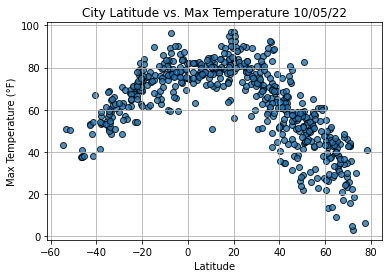

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (\N{DEGREE SIGN}F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig('./weather_data/Fig1.png', bbox_inches='tight', facecolor='w')

# Show plot.
plt.show()

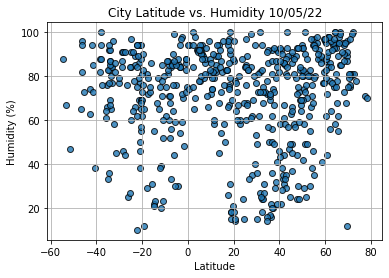

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig('./weather_data/Fig2.png', bbox_inches='tight', facecolor='w')
# Show plot.
plt.show()

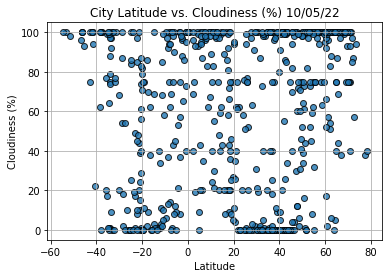

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig('./weather_data/Fig3.png', bbox_inches='tight', facecolor='w')
# Show plot.
plt.show()

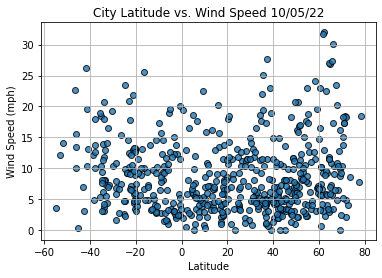

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig('./weather_data/Fig4.png', bbox_inches='tight', facecolor='w')
# Show plot.
plt.show()

In [16]:
# Create a function to perform linear regression on the weather data, and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    if 'northern' in title.lower():
        # Linear regression on the Northern Hemisphere
        x_values = northern_hemi_df[x_values]
        y_values = northern_hemi_df[y_values]
    elif 'southern' in title.lower():
        # Linear regression on the Southern Hemisphere
        x_values = southern_hemi_df[x_values]
        y_values = southern_hemi_df[y_values]
        
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    return np.round(r_value, 5), p_value, np.round(std_err, 5)

In [17]:
# city_data_df.loc[13]
# city_data_df.loc[np.round(city_data_df["Lat"]) == 0]
# city_data_df.loc[np.round(city_data_df["Lng"]) == 0]

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

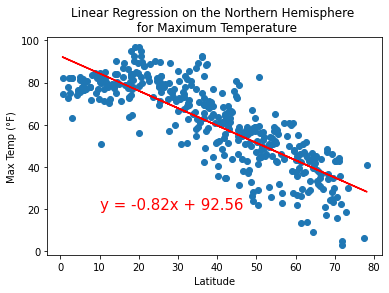

(-0.81759, 8.326282337941167e-95, 0.02944)

In [31]:
# Call the function for generating linear regression on the Northern Hemisphere
plot_linear_regression('Lat', 'Max Temp',
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp (\N{DEGREE SIGN}F)',
                       (10,20))

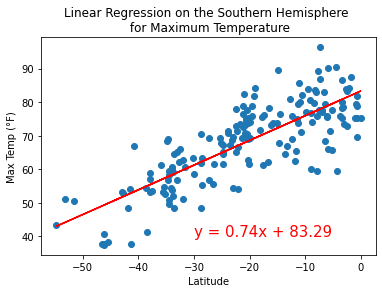

(0.79962, 2.1835765827416093e-40, 0.04185)

In [32]:
# Call the function for generating linear regression on the Southern Hemisphere
plot_linear_regression('Lat', 'Max Temp',
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp (\N{DEGREE SIGN}F)',
                       (-30,40))

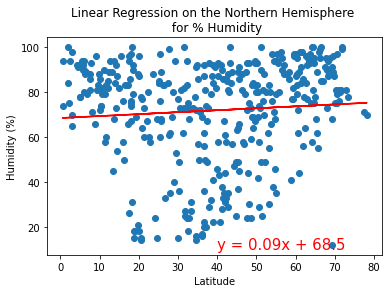

(0.07449, 0.1425209350197949, 0.05883)

In [33]:
# Call the function for generating linear regression on the Northern Hemisphere
plot_linear_regression('Lat', 'Humidity',
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       'Humidity (%)',
                       (40,10))

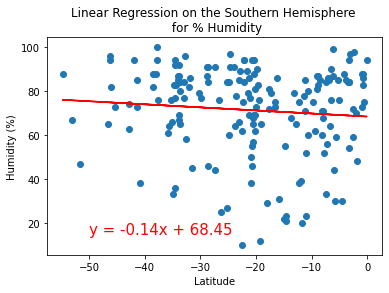

(-0.08977, 0.23610093221521491, 0.11705)

In [34]:
# Call the function for generating linear regression on the Southern Hemisphere
plot_linear_regression('Lat', 'Humidity',
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       'Humidity (%)',
                       (-50,15))

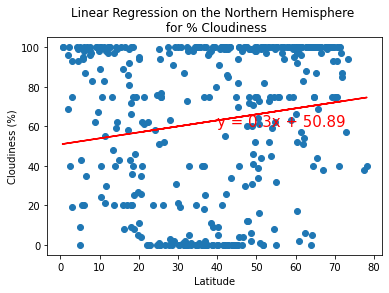

(0.15439, 0.0022614924208258563, 0.09863)

In [35]:
# Call the function for generating linear regression on the Northern Hemisphere
plot_linear_regression('Lat', 'Cloudiness',
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       'Cloudiness (%)',
                       (40,60))

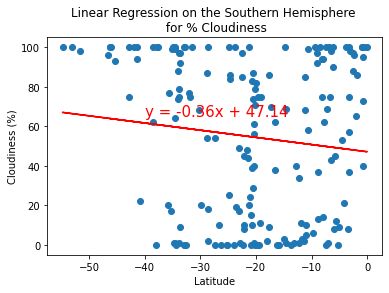

(-0.1203, 0.1117495146937696, 0.22724)

In [36]:
# Call the function for generating linear regression on the Southern Hemisphere
plot_linear_regression('Lat', 'Cloudiness',
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       'Cloudiness (%)',
                       (-40,65))

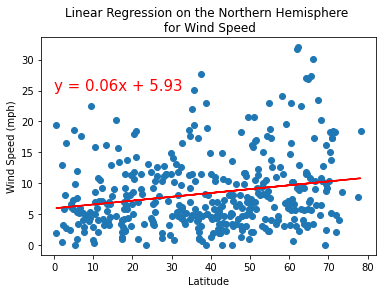

(0.20521, 4.546548043897751e-05, 0.01507)

In [37]:
# Call the function for generating linear regression on the Northern Hemisphere
plot_linear_regression('Lat', 'Wind Speed',
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',
                       (0,25))

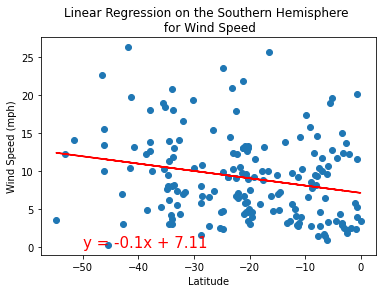

(-0.22909, 0.002226009737429281, 0.03094)

In [38]:
# Call the function for generating linear regression on the Southern Hemisphere
plot_linear_regression('Lat', 'Wind Speed',
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)',
                       (-50,0))